# Polynomial regression 

Non-linear one-dimensional polynomial regression model can be turned into a multiple linear regression model.

Use the following transformation.

$$
x_1 = x\\
x_2 = x^2\\
x_3 = x^4
$$

So, LE can be used.

NOTE: Nonlinear means nonlinear by parameters.

How to distinguish a LR from a NLR problem?

* Inspect visually: Plot x and y
* Compute correlation coefficient between target output var and all predictive vars, and if higher than 0.7 then NLR problem.
* Based on accuracy - test LR model and check if low accuracy.


How to model my data if NL in scatter plot?
* Polynomial regression
* NLR model
* Transfor data (OUT OF SCOPE OF THE COURSE!)

# Practical 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Load dataset as a data frame

In [4]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

Inspect data visually for any nonlinear trends

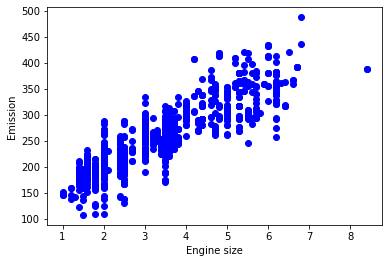

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Split dataset into train and test sets

In [41]:
mask = np.random.rand(len(cdf)) < 0.8
train = cdf[mask]
test  = cdf[~mask]

Import relevant functions

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

Split train and test sets into components

In [43]:
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train['CO2EMISSIONS'])

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])

Transform data into a multivairate representation

In [44]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

In [45]:
train_x

array([[2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [2.4],
       [3.5],
       [5.9],
       [5.9],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [4. ],
       [6.3],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [4. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [6. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
      

In [46]:
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

STATEMENT: Polynomial regression is a special case of linear regression.

Train MLR model 

In [47]:
model = linear_model.LinearRegression()
model.fit(train_x_poly, train_y)

LinearRegression()

In [48]:
print("Model parameters: ", model.coef_)
print("Model intercept: ", model.intercept_)

Model parameters:  [ 0.         49.3431712  -1.36232159]
Model intercept:  109.16691899601457


Test model and compare with analytical solution

Text(0, 0.5, 'Emission')

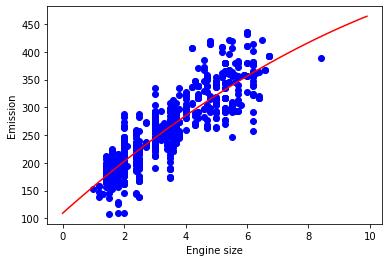

In [49]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_+ model.coef_[1]*XX+ model.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluation metrics

In [50]:
from sklearn.metrics import r2_score

In [51]:
test_x_poly = poly.fit_transform(test_x)
test_y_hat = model.predict(test_x_poly)

In [57]:
print("Mean Absolute Error (MAE): ", np.mean(np.abs(test_y_hat - test_y)))
print("R-2 score (Prediction performance): ", r2_score(test_y, test_y_hat))

Mean Absolute Error (MAE):  68.12909782089743
R-2 score (Prediction performance):  0.7997411879133995


# Further practice

Use a cubic regression and check if accuracy improves

In [59]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

In [60]:
train_x_poly

array([[ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [62]:
model = linear_model.LinearRegression()
model.fit(train_x_poly, train_y)

LinearRegression()

In [64]:
print("Model parameters: ", model.coef_)
print("Model intercept: ", model.intercept_)

Model parameters:  [ 0.         17.67723412  7.57536074 -0.75998075]
Model intercept:  142.0532359426389


Text(0, 0.5, 'Emission')

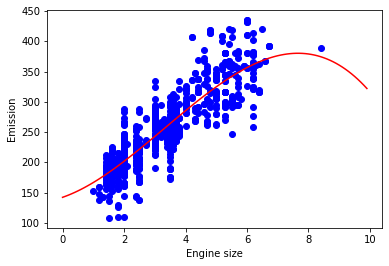

In [66]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_+ model.coef_[1]*XX+ model.coef_[2]*np.power(XX, 2) + model.coef_[3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluate performance

In [68]:
test_x_poly = poly.fit_transform(test_x)
test_y_hat = model.predict(test_x_poly)

In [69]:
print("R2-score (Prediction performance): ", r2_score(test_y, test_y_hat))

R2-score (Prediction performance):  0.7955568440948705


CONCLUSION: The performance of the prediction accuracy just improved marginally 